# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the OpenWeatherMap API key
weather_api_key = "52cbaebaf0e79ed48b6e857b932b88b7"

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        
        # If the request is successful (status code 200), parse the JSON and retrieve data
        if response.status_code == 200:
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print("City not found. Skipping...")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"Error processing {city}: {e}")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | flying fish cove
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | santa cruz del norte
Processing Record 5 of Set 1 | gbarnga
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | cuyamel
Processing Record 8 of Set 1 | skara
Processing Record 9 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 10 of Set 1 | vitebsk
Processing Record 11 of Set 1 | gargalianoi
Processing Record 12 of Set 1 | sulak
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | cukai
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | nar'yan-mar
Processing Record 17 of Set 1 | rosignano solvay-castiglioncello
City not found. Skipping...
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | enewetak
Processing Record 20 of Set 1 | blackmans bay
Proces

Processing Record 36 of Set 4 | outokumpu
Processing Record 37 of Set 4 | northam
Processing Record 38 of Set 4 | pizhou
Processing Record 39 of Set 4 | xai-xai
Processing Record 40 of Set 4 | altai
Processing Record 41 of Set 4 | palikir - national government center
Processing Record 42 of Set 4 | saudarkrokur
Processing Record 43 of Set 4 | revda
Processing Record 44 of Set 4 | anadyr
Processing Record 45 of Set 4 | sur
Processing Record 46 of Set 4 | antsiranana
Processing Record 47 of Set 4 | agat village
Processing Record 48 of Set 4 | prince rupert
Processing Record 49 of Set 4 | qalat
Processing Record 0 of Set 5 | malone
Processing Record 1 of Set 5 | ust-nera
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | afaahiti
Processing Record 4 of Set 5 | maun
Processing Record 5 of Set 5 | cloquet
Processing Record 6 of Set 5 | saint-philippe
Processing Record 7 of Set 5 | ves'yegonsk
Processing Record 8 of Set 5 | talara
Processing Record 9 of Set 5 | rongelap
Proc

Processing Record 34 of Set 8 | znamenskoye
Processing Record 35 of Set 8 | machico
Processing Record 36 of Set 8 | buchanan
Processing Record 37 of Set 8 | iranshahr
Processing Record 38 of Set 8 | mukah
City not found. Skipping...
Processing Record 39 of Set 8 | embi
Processing Record 40 of Set 8 | grand gaube
Processing Record 41 of Set 8 | comodoro rivadavia
Processing Record 42 of Set 8 | prainha
Processing Record 43 of Set 8 | caburan
Processing Record 44 of Set 8 | nagqu
Processing Record 45 of Set 8 | san andros
City not found. Skipping...
Processing Record 46 of Set 8 | brookings
Processing Record 47 of Set 8 | gisborne
Processing Record 48 of Set 8 | katsuura
Processing Record 49 of Set 8 | dara
Processing Record 0 of Set 9 | barra de santo antonio
Processing Record 1 of Set 9 | tangalle
Processing Record 2 of Set 9 | acajutla
Processing Record 3 of Set 9 | sitka
Processing Record 4 of Set 9 | mount isa
Processing Record 5 of Set 9 | saldanha
Processing Record 6 of Set 9 | mi

Processing Record 21 of Set 12 | bushehr
Processing Record 22 of Set 12 | troitsko-pechorsk
Processing Record 23 of Set 12 | desna
Processing Record 24 of Set 12 | plastun
Processing Record 25 of Set 12 | khash
Processing Record 26 of Set 12 | likiep
Processing Record 27 of Set 12 | forster
Processing Record 28 of Set 12 | tolanaro
Processing Record 29 of Set 12 | cidreira
Processing Record 30 of Set 12 | bolgatanga
Processing Record 31 of Set 12 | qarqaraly
Processing Record 32 of Set 12 | kabalo
Processing Record 33 of Set 12 | hadibu
Processing Record 34 of Set 12 | suva
Processing Record 35 of Set 12 | paradera
City not found. Skipping...
Processing Record 36 of Set 12 | rio grande
Processing Record 37 of Set 12 | yarmouth
Processing Record 38 of Set 12 | lauro de freitas
Processing Record 39 of Set 12 | lae
Processing Record 40 of Set 12 | kokshetau
Processing Record 41 of Set 12 | labytnangi
Processing Record 42 of Set 12 | guiratinga
Processing Record 43 of Set 12 | broken hill


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,flying fish cove,-10.4217,105.6791,301.97,74,75,3.60,CX,1705115821
1,west island,-12.1568,96.8225,301.14,94,40,2.57,CC,1705115821
2,hermanus,-34.4187,19.2345,291.80,89,0,0.58,ZA,1705115822
3,santa cruz del norte,23.1539,-81.9236,296.86,91,13,4.59,CU,1705115822
4,gbarnga,6.9956,-9.4722,295.03,100,34,0.90,LR,1705115822


In [7]:
# Export the City_Data into a CSV file
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,flying fish cove,-10.4217,105.6791,301.97,74,75,3.60,CX,1705115821
1,west island,-12.1568,96.8225,301.14,94,40,2.57,CC,1705115821
2,hermanus,-34.4187,19.2345,291.80,89,0,0.58,ZA,1705115822
3,santa cruz del norte,23.1539,-81.9236,296.86,91,13,4.59,CU,1705115822
4,gbarnga,6.9956,-9.4722,295.03,100,34,0.90,LR,1705115822


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

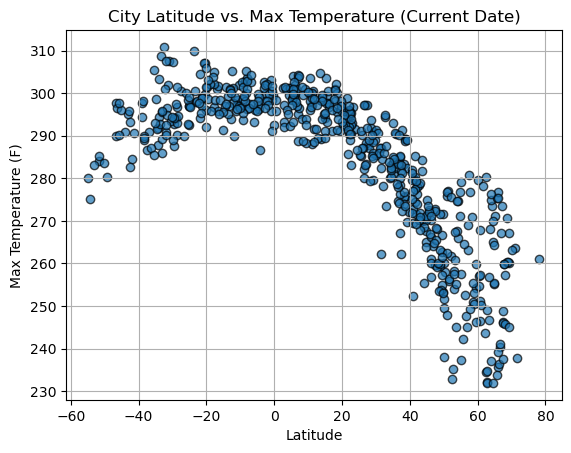

In [9]:
# Build scatter plot for Latitude vs. Temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

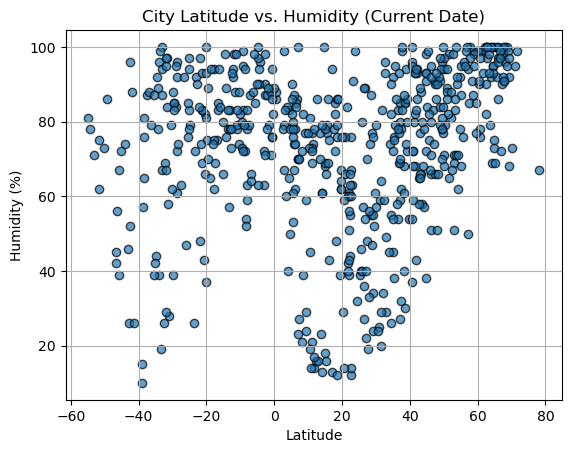

In [10]:
# Build the scatter plot for Latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

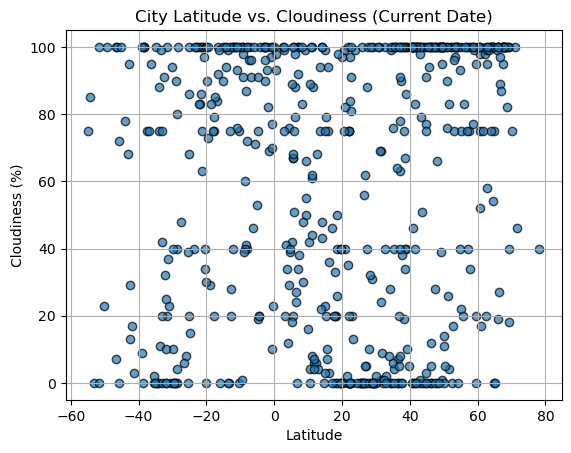

In [11]:
# Build the scatter plot for Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

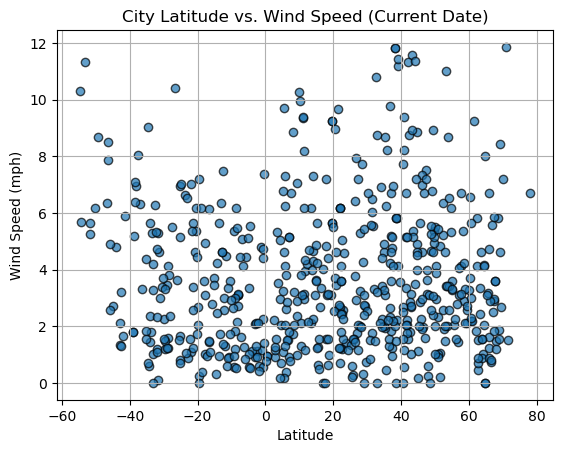

In [12]:
# Build the scatter plot for Latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.7)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, coordinates, fontsize=12, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

    # Save the figure
    plt.savefig(f"../output_data/{hemisphere}_{title.replace(' ', '_')}_Linear_Regression.png")

    # Show plot
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,santa cruz del norte,23.1539,-81.9236,296.86,91,13,4.59,CU,1705115822
4,gbarnga,6.9956,-9.4722,295.03,100,34,0.90,LR,1705115822
6,cuyamel,15.6667,-88.2000,299.27,77,7,1.28,HN,1705115823
7,skara,58.3866,13.4384,270.79,91,100,5.36,SE,1705115823
8,vitebsk,55.1905,30.2033,257.44,95,22,3.28,BY,1705115704


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,flying fish cove,-10.4217,105.6791,301.97,74,75,3.60,CX,1705115821
1,west island,-12.1568,96.8225,301.14,94,40,2.57,CC,1705115821
2,hermanus,-34.4187,19.2345,291.80,89,0,0.58,ZA,1705115822
5,port-aux-francais,-49.3500,70.2167,280.21,86,100,8.68,TF,1705115823
11,puerto ayora,-0.7393,-90.3518,298.46,94,10,2.24,EC,1705115836


###  Temperature vs. Latitude Linear Regression Plot

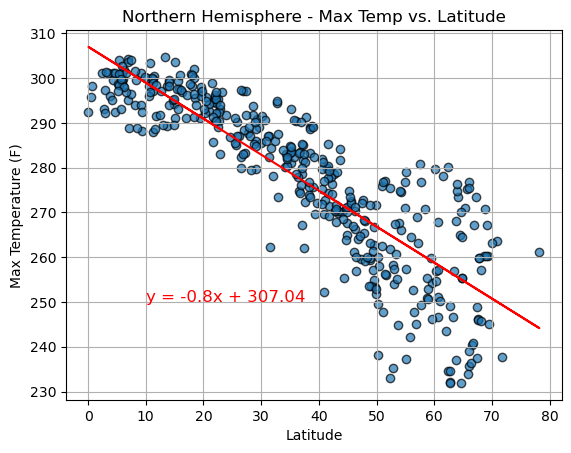

In [24]:
# Linear regression on Northern Hemisphere for Temperature
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere - Max Temp vs. Latitude",
                       "Latitude", "Max Temperature (F)",
                       "northern", (10, 250))

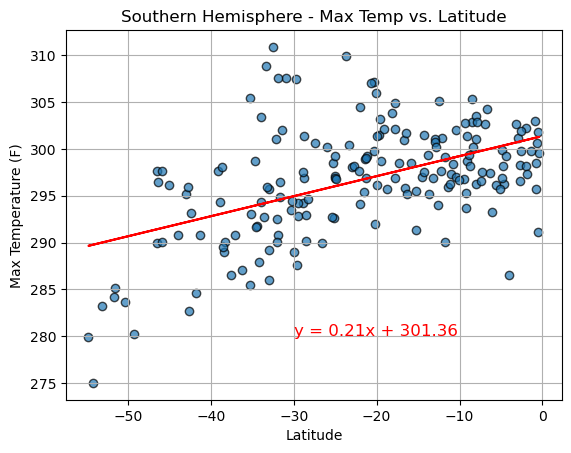

In [25]:
# Linear regression on Southern Hemisphere for Temperature
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere - Max Temp vs. Latitude",
                       "Latitude", "Max Temperature (F)",
                       "southern", (-30, 280))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

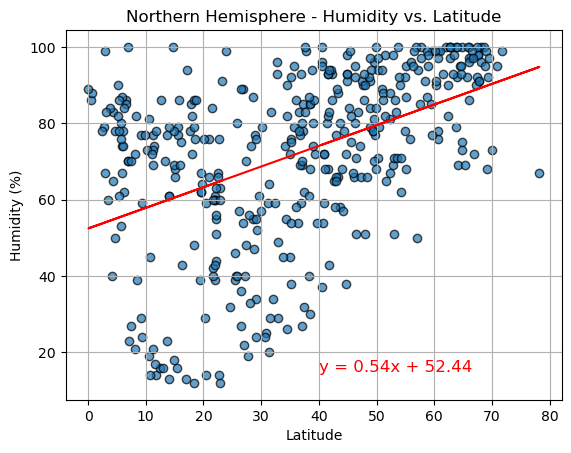

In [17]:
# Linear regression on Northern Hemisphere for Humidity
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere - Humidity vs. Latitude",
                       "Latitude", "Humidity (%)",
                       "northern", (40, 15))

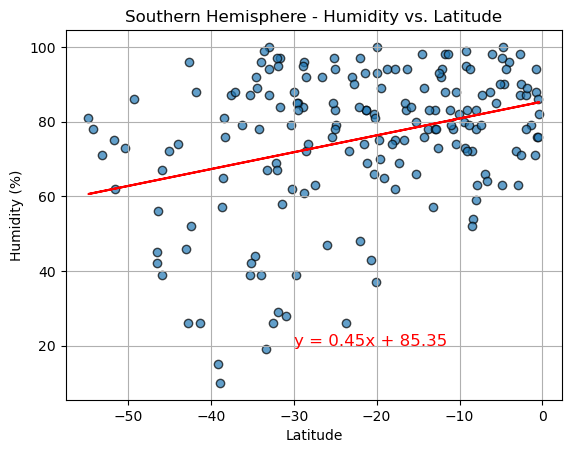

In [19]:
# Linear regression on Southern Hemisphere for Humidity
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere - Humidity vs. Latitude",
                       "Latitude", "Humidity (%)",
                       "southern", (-30, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

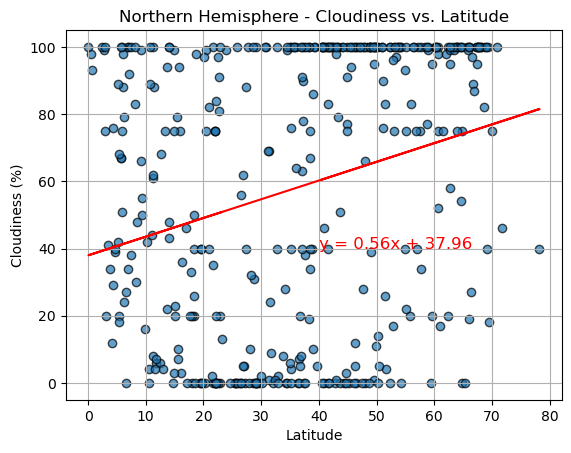

In [20]:
# Linear regression on Northern Hemisphere for Cloudiness
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere - Cloudiness vs. Latitude",
                       "Latitude", "Cloudiness (%)",
                       "northern", (40, 40))

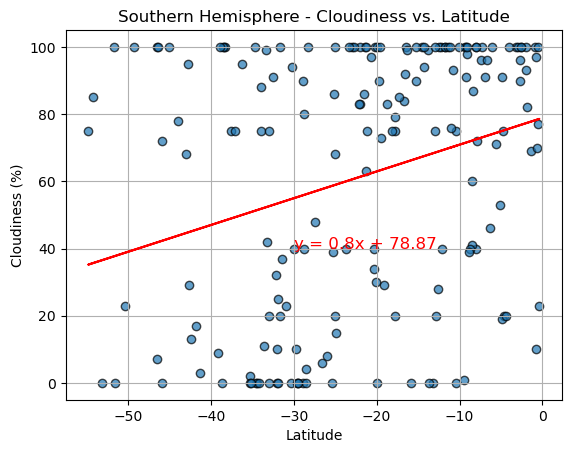

In [21]:
# Linear regression on Southern Hemisphere for Cloudiness
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere - Cloudiness vs. Latitude",
                       "Latitude", "Cloudiness (%)",
                       "southern", (-30, 40))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

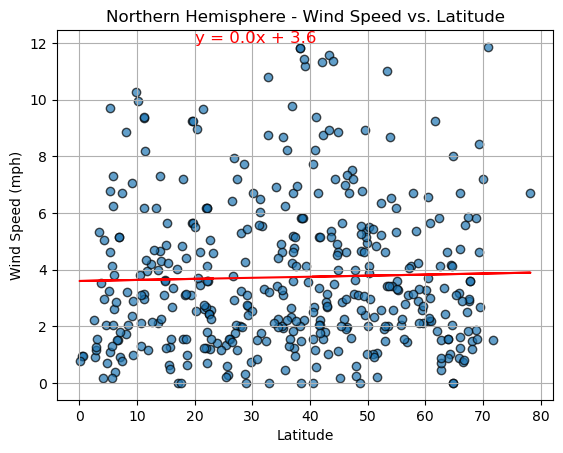

In [22]:
# Linear regression on Northern Hemisphere for Wind Speed
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere - Wind Speed vs. Latitude",
                       "Latitude", "Wind Speed (mph)",
                       "northern", (20, 12))


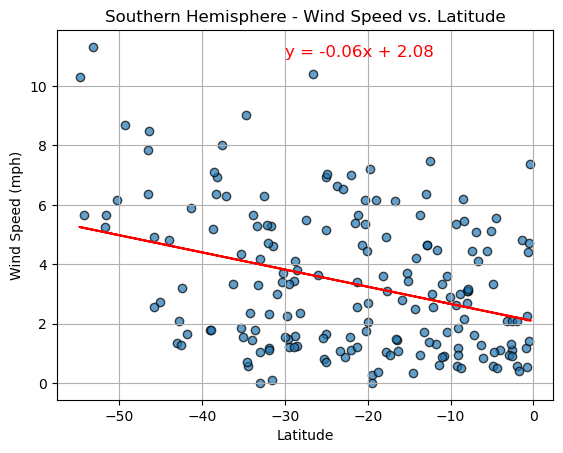

In [23]:
# Linear regression on Southern Hemisphere for Wind Speed
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere - Wind Speed vs. Latitude",
                       "Latitude", "Wind Speed (mph)",
                       "southern", (-30, 11))

**Discussion about the linear relationship:** YOUR RESPONSE HERE